In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore") # Caution with this as any warning is suppresed

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import the training and testing data sets as pandas dataframes

In [2]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

**Check out the top of the data set.**

In [3]:
train_len = len(df_train)
train_len

1460

## In order to clean both data sets at the same time, combine the train and test.
    
**This is necessary for making the dummy variables later in case there are some differences in the catagories in the train vs test.**

In [4]:
df = pd.concat([df_train, df_test],ignore_index=True)

In [5]:
df[train_len-3:train_len+4]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500.0
1460,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1461,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
1462,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
1463,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN


In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


**View the correlation of the numeric columns to "SalePrice" as a simple first look.**

In [7]:
df[train_len:len(df)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1461,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
1462,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
1463,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
1464,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [8]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

### Scatter Plot the highest correlated fields
The train are the only ones with 'SalePrice' (obviously) so they are not plotted

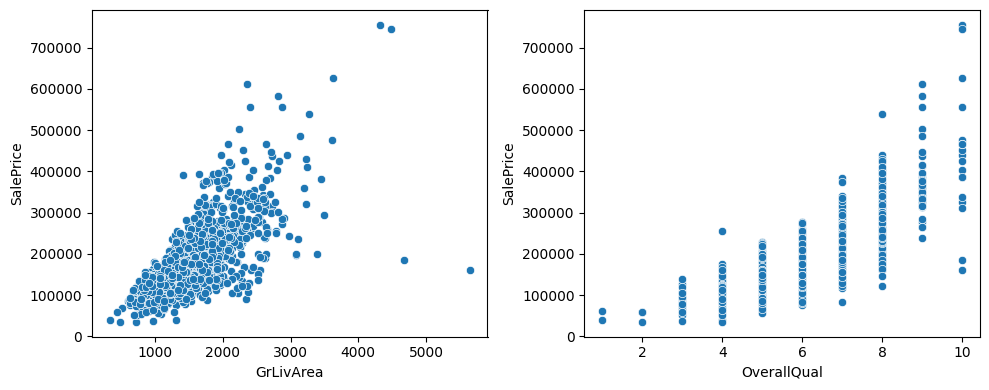

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
s1 = sns.scatterplot(data=df, x='GrLivArea',y='SalePrice', ax=axes[0])
s2 = sns.scatterplot(data=df, x='OverallQual',y='SalePrice', ax=axes[1])
fig.tight_layout()

Two main outlier data points

In [10]:
df[(df['GrLivArea']>4500) & (df['SalePrice']<300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750.0
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0


In [11]:
subset = df[df['SaleCondition'] == 'Partial']
sebset_test =df_test[df_test['SaleCondition'] == 'Partial'] # Run same process on test

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

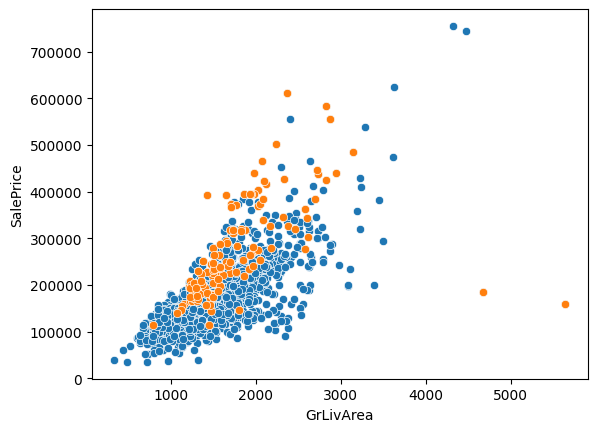

In [12]:
sns.scatterplot(data=df, x='GrLivArea',y='SalePrice')
sns.scatterplot(data=subset, x='GrLivArea',y='SalePrice')

In [13]:
outliers_idx = df[(df['GrLivArea']>4500) & (df['SalePrice']<300000)].index

Drop those two data points

In [14]:
df=df.drop(outliers_idx, axis = 0)
train_len -= len(outliers_idx)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

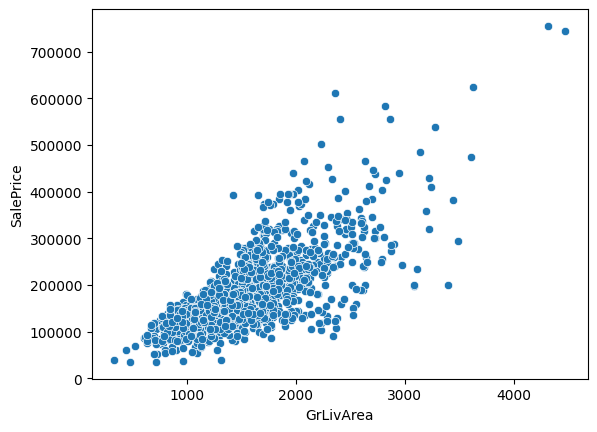

In [15]:
sns.scatterplot(data=df, x='GrLivArea',y='SalePrice')

### Check out the heat map correlation of the various fields

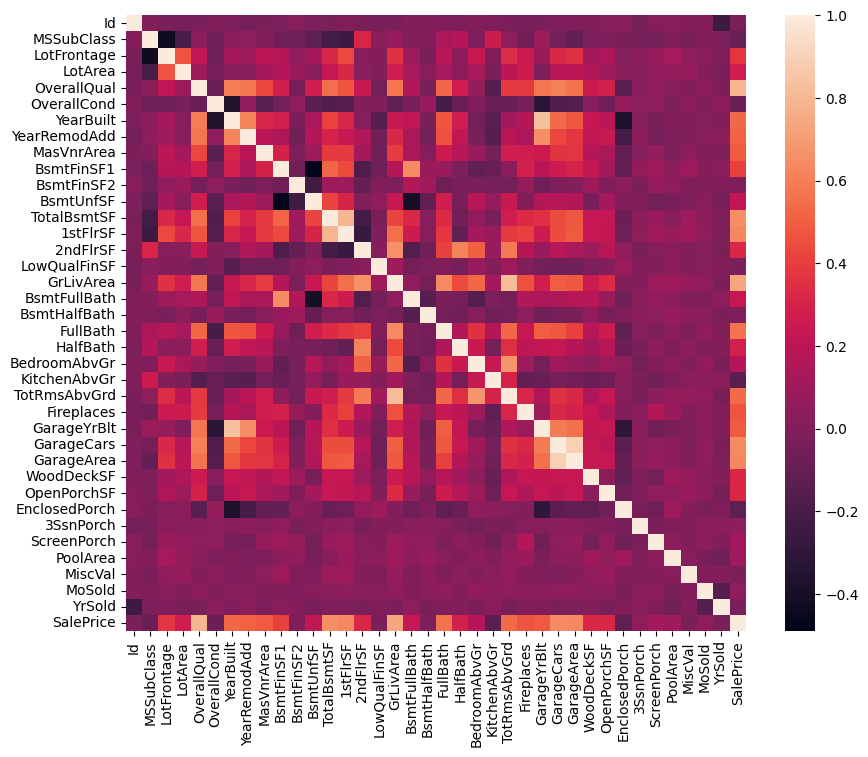

In [16]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr(numeric_only=True));

### Go through the data that is missing (na) and either drop of fill those values.

In [17]:
# Function to check for missing data
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    return percent_nan[percent_nan > 0].sort_values()

In [18]:
percent_nan = percent_missing(df)
percent_nan_test = percent_missing(df_test)

### Plots show the % of missing data per field so that they can be filled or dropped
Process depends on the field for if it should be a 0 or a string.

(0.0, 5.0)

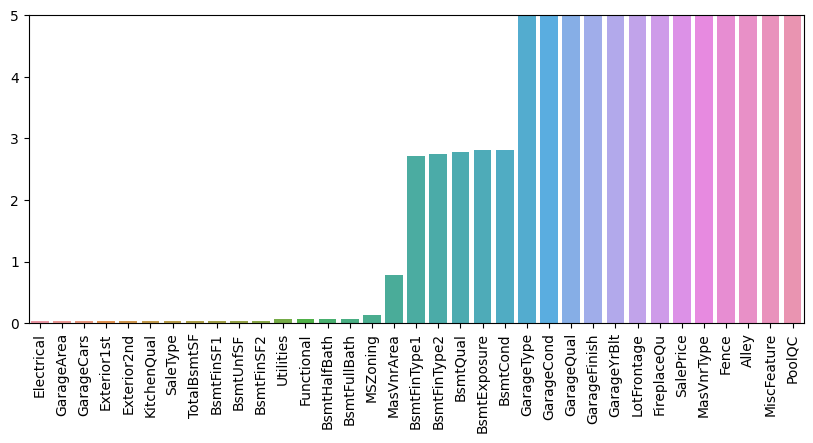

In [19]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
s1 = sns.barplot(x=percent_nan.index, y = percent_nan, ax=ax1)
s1.set_xticklabels(percent_nan.index,rotation=90)
s1.set_ylim(0,5)


In [20]:
electrical_idx = df[df['Electrical'].isnull()==True].index
electrical_idx

Index([1379], dtype='int64')

In [21]:
df=df.drop(electrical_idx, axis = 0)
train_len -= len(electrical_idx)

**Electrical is fixed by dropping one row &#x2713;**

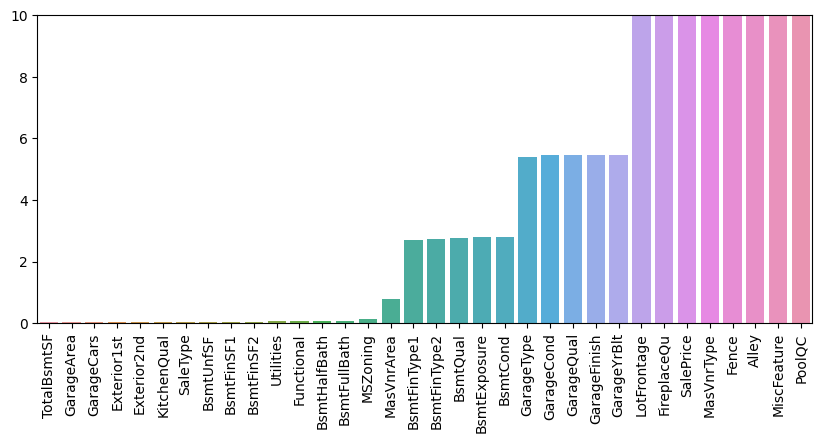

In [22]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y = percent_nan, ax=ax1)
plt.xticks(rotation=90)
plt.ylim(0,10);

In [23]:
# Fill the MasVnrArea with 0 since na probably means it just doen not exist
df['MasVnrArea']= df['MasVnrArea'].fillna(0)

# Catagorical basement features
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

# Garage Numericals fillna with 0
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

# Garage Columns Catagories
gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

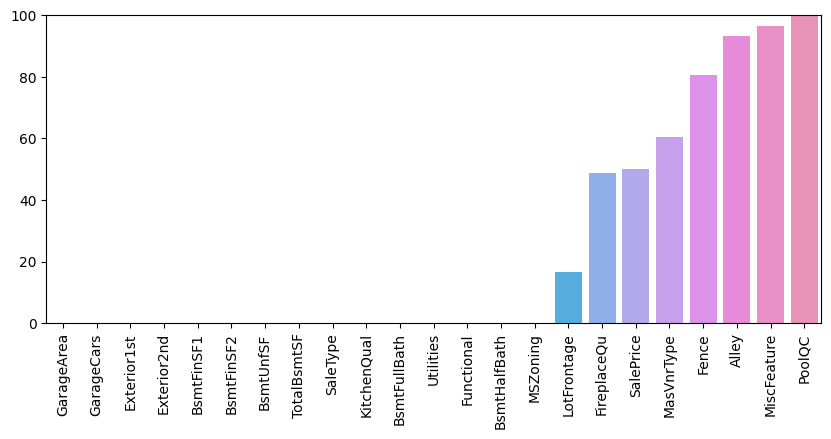

In [24]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y = percent_nan, ax=ax1)
plt.xticks(rotation=90)
plt.ylim(0,100);

Left over fields with missing values.

In [25]:
df[['LotFrontage', 'FireplaceQu', 'MasVnrType', 'Fence', 'Alley', 'MiscFeature','PoolQC']]

,LotFrontage,FireplaceQu,MasVnrType,Fence,Alley,MiscFeature,PoolQC
0,65.0,NaN,BrkFace,NaN,NaN,NaN,NaN
1,80.0,TA,NaN,NaN,NaN,NaN,NaN
2,68.0,TA,BrkFace,NaN,NaN,NaN,NaN
3,60.0,Gd,NaN,NaN,NaN,NaN,NaN
4,84.0,TA,BrkFace,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2914,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2915,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2916,160.0,TA,NaN,NaN,NaN,NaN,NaN
2917,62.0,NaN,NaN,MnPrv,NaN,Shed,NaN


Drop some of the fields that are pretty empty and fill some others with 'None' string

In [26]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)
df['FireplaceQu']= df['FireplaceQu'].fillna('None')
df['MasVnrType']= df['MasVnrType'].fillna('None')

**For 'LotFrontage', fill the values with the average per neighborhood (assuming that houses in the same Neighborhoods are similar).**

In [27]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

<Axes: xlabel='LotFrontage', ylabel='Neighborhood'>

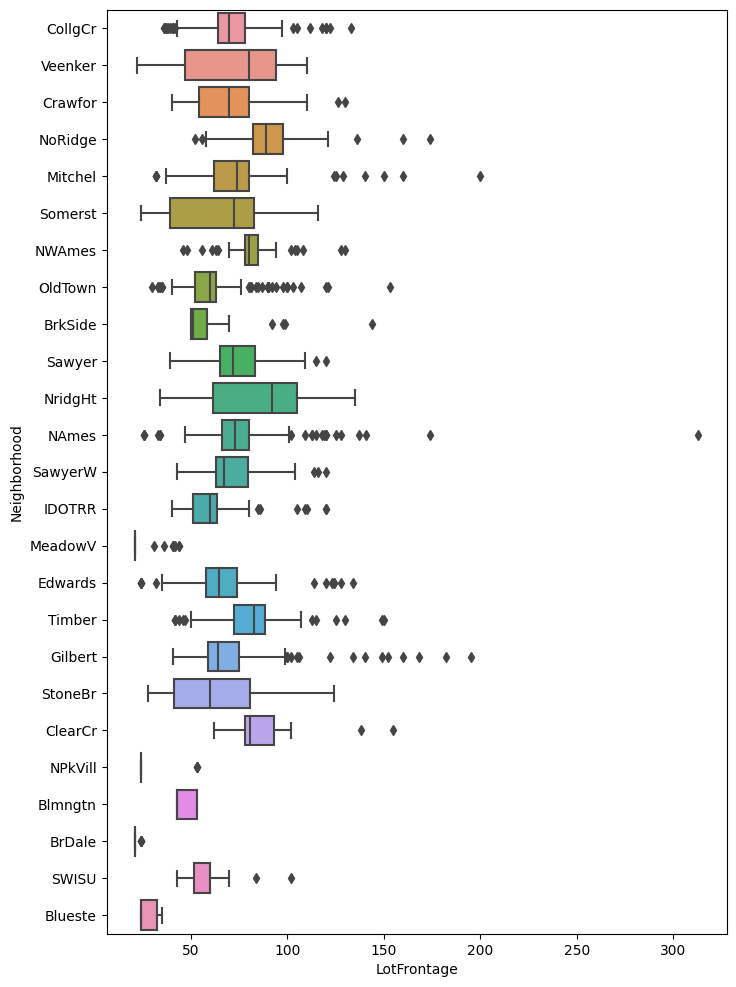

In [28]:
plt.figure(figsize=(8,12))
sns.boxplot(x='LotFrontage',y='Neighborhood',data=df,orient='h')

In [29]:
# Calculate the mean of the *training only* grouped values
df_train.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [30]:
df['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))
df['LotFrontage'] = df['LotFrontage'].fillna(0)

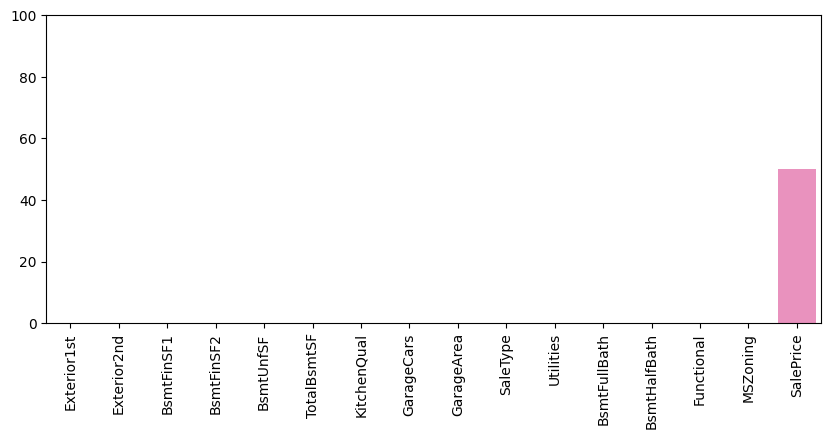

In [31]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y = percent_nan, ax=ax1)
plt.xticks(rotation=90)
plt.ylim(0,100);

The left overs I will just fill with 0s

In [32]:
df = df.fillna(0)

### The data are all filled and cleaned with all columns having non-null values

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 0 to 2918
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2916 non-null   int64  
 1   MSSubClass     2916 non-null   int64  
 2   MSZoning       2916 non-null   object 
 3   LotFrontage    2916 non-null   float64
 4   LotArea        2916 non-null   int64  
 5   Street         2916 non-null   object 
 6   LotShape       2916 non-null   object 
 7   LandContour    2916 non-null   object 
 8   Utilities      2916 non-null   object 
 9   LotConfig      2916 non-null   object 
 10  LandSlope      2916 non-null   object 
 11  Neighborhood   2916 non-null   object 
 12  Condition1     2916 non-null   object 
 13  Condition2     2916 non-null   object 
 14  BldgType       2916 non-null   object 
 15  HouseStyle     2916 non-null   object 
 16  OverallQual    2916 non-null   int64  
 17  OverallCond    2916 non-null   int64  
 18  YearBuilt    

# Split the cleaned data back out for train and test
### Use Numerical and Convert the catagorical data to dummy variables as comparison

In [34]:
df_train = df[0:train_len]
df_test = df[train_len:]
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125.0
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500.0


In [35]:
df_numeric = df.select_dtypes(exclude='object')
df_object = df.select_dtypes(include='object')

In [36]:
df_object_dummies = pd.get_dummies(df_object, drop_first=True, dtype=int)
df_dummies = pd.concat([df_numeric, df_object_dummies], axis = 1)

### Split data using the dummy data so ther same split is used for both versions

In [37]:
df_dummy_train = df_dummies[0:train_len]
df_dummy_test = df_dummies[train_len:]
# Final Test Data set
df_dummy_test.drop('SalePrice',axis=1, inplace=True)

In [38]:
df_dummy_train.corr()['SalePrice'].sort_values(ascending=False)[0:20]

SalePrice               1.000000
OverallQual             0.795863
GrLivArea               0.734962
TotalBsmtSF             0.651553
GarageCars              0.641111
1stFlrSF                0.631667
GarageArea              0.629209
FullBath                0.562384
TotRmsAbvGrd            0.537826
YearBuilt               0.523986
KitchenQual_Ex          0.509411
YearRemodAdd            0.508047
Foundation_PConc        0.498692
MasVnrArea              0.477802
Fireplaces              0.469903
ExterQual_Gd            0.452529
BsmtFinType1_GLQ        0.435577
BsmtFinSF1              0.409415
Neighborhood_NridgHt    0.402123
LotFrontage             0.364668
Name: SalePrice, dtype: float64

-----
# Data has been cleaned and is ready for some learning and regression predictions
### Split data using the dummy data so ther same split is used for both versions

In [39]:
X = df_dummy_train.drop('SalePrice', axis=1)
y = df_dummy_train['SalePrice']
num_cols = df_numeric.columns

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Train test split 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=814)

### First test: Elastic Net with just the numerical feature columns

In [42]:
X_train_num = X_train[num_cols.drop('SalePrice')]
X_test_num = X_test[num_cols.drop('SalePrice')]

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
scaler.fit(X_train_num)
scaled_X_train_num = scaler.transform(X_train_num)
scaled_X_test_num = scaler.transform(X_test_num)

In [45]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [46]:
EN_model = ElasticNet(max_iter=10000)
param_grid = {'alpha':[0.1,1,5,10,50,100,200], 
              'l1_ratio':[0.1,0.5,0.7,0.95,0.99,1]}

In [47]:
grid_model = GridSearchCV(estimator=EN_model, param_grid=param_grid,
                         scoring = 'neg_mean_squared_error', cv = 5, verbose=0)

In [48]:
set1_grid_start = time.time()
grid_model.fit(scaled_X_train_num, y_train)
set1_grid_end = time.time()
print(f'The Numerical Data fit took {set1_grid_end-set1_grid_start:.2f}s to run')

The Numerical Data fit took 11.13s to run


In [49]:
grid_model.best_estimator_

ElasticNet(alpha=200, l1_ratio=1, max_iter=10000)

In [50]:
y_pred_num = grid_model.predict(scaled_X_test_num)

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
rmse1 = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_num)))
print(f"Numerical Data only resulted in a percent error of: {rmse1 / np.log(y_test).mean() *100:.2f}%")
print(f"RMSE of log values = {rmse1:.3f}")

Numerical Data only resulted in a percent error of: 2.28%
RMSE of log values = 0.274


<Axes: xlabel='SalePrice'>

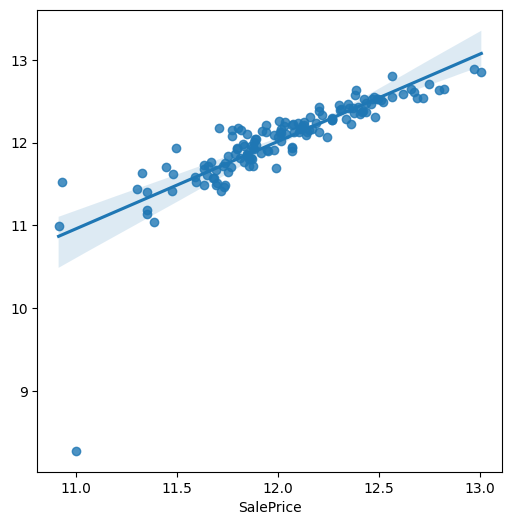

In [53]:
plt.figure(figsize=(6,6))
sns.regplot(x=np.log(y_test), y=np.log(y_pred_num), fit_reg=True)

### Second test: Elastic Net with the numerical and dummy feature columns

In [54]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [55]:
EN_model = ElasticNet(max_iter=10000)
param_grid = {'alpha':[0.1,1,5,10,50,100,200], 
              'l1_ratio':[0.1,0.5,0.7,0.95,0.99,1]}

In [56]:
grid_model = GridSearchCV(estimator=EN_model, param_grid=param_grid,
                         scoring = 'neg_mean_squared_error', cv = 5, verbose=0)

In [57]:
set2_grid_start = time.time()
grid_model.fit(scaled_X_train, y_train)
set2_grid_end = time.time()
print(f'The Dummy and Numerical Data fit took {set2_grid_end-set2_grid_start:.2f}s to run')

The Dummy and Numerical Data fit took 94.12s to run


In [58]:
grid_model.best_estimator_

ElasticNet(alpha=200, l1_ratio=1, max_iter=10000)

In [59]:
y_pred = grid_model.predict(scaled_X_test)

In [60]:
rmse2 = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))
print(f"All Data (using dummy variables) resulted in a percent error of: {rmse2 / np.log(y_test).mean() *100:.2f}%")
print(f"RMSE of log values = {rmse2:.3f}")

All Data (using dummy variables) resulted in a percent error of: 1.28%
RMSE of log values = 0.154


<Axes: xlabel='SalePrice'>

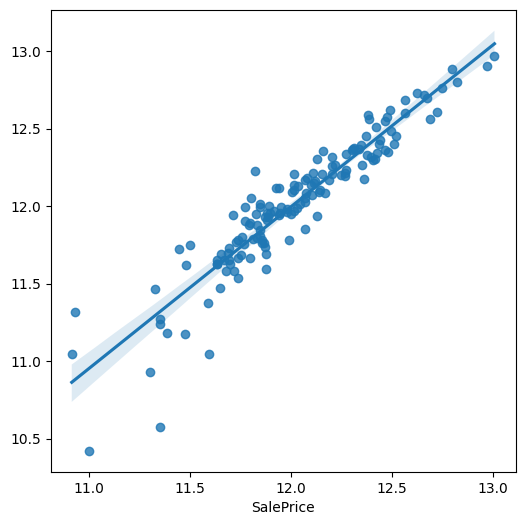

In [61]:
plt.figure(figsize=(6,6))
sns.regplot(x=np.log(y_test), y=np.log(y_pred), fit_reg=True)

In [62]:
print("--"*30)
print(f"Numerical Data only resulted in a percent error of: {rmse1 / (np.log(y_test)).mean() *100:.2f}%")
print(f"All Data (using dummy variables) resulted in a percent error of: {rmse2 / (np.log(y_test)).mean() *100:.2f}%")

------------------------------------------------------------
Numerical Data only resulted in a percent error of: 2.28%
All Data (using dummy variables) resulted in a percent error of: 1.28%


### Third test: Random forest with the numerical and dummy feature columns

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rfr = RandomForestRegressor(n_estimators=10)

In [65]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [66]:
y_pred_rfr = rfr.predict(X_test)

In [67]:
rmse3 = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_rfr)))
print(f"All Data (using dummy variables) resulted in a percent error of: {rmse3 / np.log(y_test).mean() *100:.2f}%")
print(f"RMSE of log values = {rmse3:.3f}")

All Data (using dummy variables) resulted in a percent error of: 1.20%
RMSE of log values = 0.144


# Re-train with best version on all the data
**Train the model with all of the training data to test with the separate test set.**

In [68]:
# Use the param grid of best setup from setp before
#EN_model = ElasticNet(max_iter=10000)
#param_grid = {'alpha':[200], 
#              'l1_ratio':[1]}
#grid_model = GridSearchCV(estimator=EN_model, param_grid=param_grid,
#                         scoring = 'neg_mean_squared_error', cv = 5, verbose=0)

In [69]:
#scaled_X_all = scaler.transform(X)

In [70]:
#final_grid_start = time.time()
#grid_model.fit(scaled_X_all, y)
#final_grid_end = time.time()
#print(f'Final Data set fit took {final_grid_end-final_grid_start:.2f}s to run')

In [71]:
#df_dummy_test.head()

In [72]:
#y_pred_final = grid_model.predict(df_dummy_test)
#y_pred_final

## Random forest Regression

In [73]:
rfr_final_grid_start = time.time()
rfr.fit(X, y)
rfr_final_grid_end = time.time()
print(f'Final Data set fit took {rfr_final_grid_end-rfr_final_grid_start:.2f}s to run')

Final Data set fit took 0.37s to run


In [74]:
y_pred_final = rfr.predict(df_dummy_test)
y_pred_final

array([119150. , 155375. , 181490. , ..., 153131.2, 108060. , 215220. ])

# Create the output file fo the final predictions

In [75]:
ids = df_dummy_test['Id']
y_pred_final

array([119150. , 155375. , 181490. , ..., 153131.2, 108060. , 215220. ])

In [76]:
output_df = pd.DataFrame({'Id': ids,
                          'SalePrice': y_pred_final.squeeze()})

Double check the output dataframe

In [77]:
output_df

,Id,SalePrice
1460,1461,119150.0
1461,1462,155375.0
1462,1463,181490.0
1463,1464,180024.0
1464,1465,209491.2
...,...,...
2914,2915,86350.0
2915,2916,88000.0
2916,2917,153131.2
2917,2918,108060.0


## Produce the final output file (.csv)

In [78]:
output_df.to_csv('/kaggle/working/submission.csv', index=False)